In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('employee_retention_data.csv')

In [3]:
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [4]:
df.isnull().sum()

employee_id        0
company_id         0
dept               0
seniority          0
salary             0
join_date          0
quit_date      11192
dtype: int64

In [5]:
df['join_date']=pd.to_datetime(df.join_date)
df['quit_date']=pd.to_datetime(df.quit_date)
df['joinint']=(df.join_date-pd.datetime(2011,1,23)).dt.days
df=df.drop("employee_id",axis=1)

In [6]:
quittable=df.dropna()
quittable.head()

,company_id,dept,seniority,salary,join_date,quit_date,joinint
0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,1156
1,7,marketing,20,183000.0,2013-04-29,2014-04-04,827
3,7,customer_service,20,115000.0,2012-05-14,2013-06-07,477
4,2,data_science,23,276000.0,2011-10-17,2014-08-22,267
5,4,data_science,14,165000.0,2012-01-30,2013-08-30,372


In [7]:
staytable=df[df.quit_date.isnull()]
staytable=staytable.drop('quit_date',axis=1)
staytable.head()

,company_id,dept,seniority,salary,join_date,joinint
2,4,marketing,14,101000.0,2014-10-13,1359
6,4,customer_service,21,107000.0,2013-10-21,1002
7,2,customer_service,4,30000.0,2014-03-05,1137
9,1,sales,7,104000.0,2012-06-12,506
11,2,marketing,17,230000.0,2015-05-11,1569


In [8]:
quittable['duration']=(df.quit_date-df.join_date).dt.days

/home/yanchu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
quittable.head()

,company_id,dept,seniority,salary,join_date,quit_date,joinint,duration
0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,1156,585.0
1,7,marketing,20,183000.0,2013-04-29,2014-04-04,827,340.0
3,7,customer_service,20,115000.0,2012-05-14,2013-06-07,477,389.0
4,2,data_science,23,276000.0,2011-10-17,2014-08-22,267,1040.0
5,4,data_science,14,165000.0,2012-01-30,2013-08-30,372,578.0


(array([[  0.,   0.,   3.,   5.,  84., 645., 855., 159.,  15.,  60., 154.,
         329., 345., 234., 110.,  87., 119., 137., 159., 146., 123., 118.,
         130., 164., 122., 105.,  47.,  31.,  11.],
        [  0.,   2.,   4.,   4., 111., 694., 963., 165.,  13.,  61., 172.,
         328., 366., 238.,  96.,  95., 113., 169., 180., 137.,  94.,  51.,
          39.,  13.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   2.,   4.,  91., 682., 926., 139.,  21.,  75., 177.,
         309., 281., 201.,  56.,  40.,  26.,   7.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   2.,   8., 104., 730., 822.,  86.,   6.,  19.,  32.,
          21.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,  20.,  18.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0

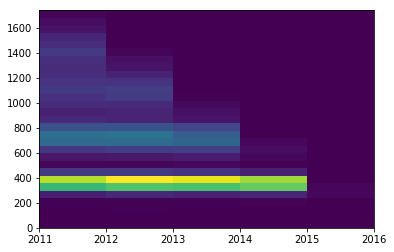

In [10]:
plt.hist2d(quittable.join_date.dt.year,quittable.duration,[range(2011,2017),range(0,1800,60)])

###### This plot shows that, according to the available data, despite being hired in various years, peole are leaving in the same pattern in terms of "duration". A lot of people leave at 1 year.

(array([0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 3.000e+00, 8.000e+00,
        8.000e+00, 1.300e+01, 5.900e+01, 3.510e+02, 9.510e+02, 1.818e+03,
        2.396e+03, 1.170e+03, 4.450e+02, 1.040e+02, 2.300e+01, 3.200e+01,
        5.400e+01, 1.610e+02, 2.100e+02, 3.250e+02, 4.040e+02, 5.830e+02,
        5.360e+02, 4.560e+02, 4.210e+02, 2.520e+02, 1.710e+02, 9.100e+01,
        1.110e+02, 1.110e+02, 1.170e+02, 1.410e+02, 1.560e+02, 1.570e+02,
        1.600e+02, 1.790e+02, 1.480e+02, 1.350e+02, 1.290e+02, 8.800e+01,
        8.000e+01, 8.900e+01, 9.300e+01, 7.600e+01, 8.700e+01, 9.000e+01,
        5.900e+01, 6.300e+01, 5.000e+01, 5.500e+01, 2.900e+01, 1.800e+01,
        2.100e+01, 1.000e+01, 9.000e+00, 2.000e+00, 0.000e+00]),
 array([   0,   30,   60,   90,  120,  150,  180,  210,  240,  270,  300,
         330,  360,  390,  420,  450,  480,  510,  540,  570,  600,  630,
         660,  690,  720,  750,  780,  810,  840,  870,  900,  930,  960,
         990, 1020, 1050, 1080, 1110, 1140, 117

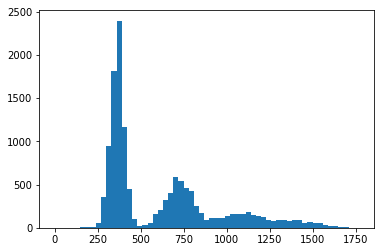

In [11]:
plt.hist(quittable.duration,range(0,1800,30))

###### People are leaving at  1 year, and 2 year to some extent too.
###### Actually it's not fair to just look at the general duration distribution, because new employees won't have long durations shown in the data (the duration of people hired in 2014 is capped at 1 years because no post 2015 data, as shown in the 2D hist)
###### But since the leaving pattern is similar, we can have a look at the possibility distribution of people hired in 2011

Text(0, 0.5, 'churn rate')

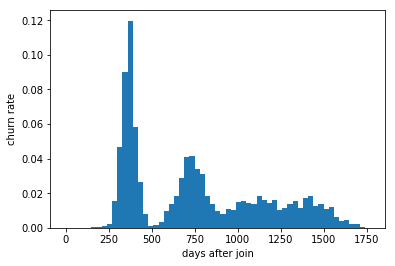

In [12]:
weight=(df['join_date']<pd.datetime(2011,12,13)).sum()
hist, bins_ = np.histogram(quittable[quittable['join_date']<pd.datetime(2011,12,13)].duration,range(0,1800,30))
freq = hist/weight
plt.bar(bins_[:-1], freq, align="edge", width=np.diff(bins_))
plt.xlabel('days after join')
plt.ylabel('churn rate')

In [13]:
freq.sum()

0.95471614755909

###### Same conclusion though. and 95% people left in 4 years time

Text(0.5, 0, 'days after 2011')

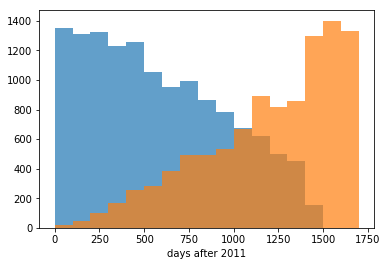

In [14]:
plt.hist(quittable.joinint,range(0,1800,100),alpha = 0.7)
plt.hist(staytable.joinint,range(0,1800,100),alpha = 0.7)
plt.xlabel('days after 2011')

###### safe to assume that everyone will leave in the scale of 4 years' time, so we need a model to predict the duration for employee in the staytable

In [15]:
quittable.groupby(['company_id']).mean()

,seniority,salary,joinint,duration
company_id,,,,
1,14.128544,147846.570006,580.883791,616.148886
2,14.124660,150018.585675,572.860834,628.699909
3,14.110385,123304.376225,586.754409,609.625735
4,13.940156,124025.151778,595.052038,599.630529
5,14.713123,124281.790437,584.468973,609.303154
6,14.089888,118827.247191,567.964888,603.494382
7,14.020231,120765.895954,586.174855,609.856936
8,13.704663,120436.960276,591.849741,592.962003
9,13.969754,123890.359168,574.308129,622.141777


In [16]:
quittable['company_id'].value_counts()

1     4621
2     2206
3     1531
4     1153
5      983
6      712
7      692
8      579
9      529
10     480
12      12
11      12
Name: company_id, dtype: int64

In [17]:
quittable.groupby(['company_id']).std()

,seniority,salary,joinint,duration
company_id,,,,
1,8.099939,76716.482336,384.699275,328.715669
2,7.880707,76505.409344,385.544454,338.799573
3,7.898802,63392.532501,392.379894,321.358003
4,7.774763,64096.012715,387.553443,324.845725
5,8.005033,62942.081676,393.652163,321.965963
6,8.126656,60977.085819,380.826383,325.991634
7,7.775031,61537.301468,371.950575,323.521929
8,7.829332,62328.941678,399.031748,325.168312
9,8.269778,66045.003608,381.589094,339.074605


###### people are more likely to leave in company 11 and 12, they both seem to be small companies, and company_12 has lower average salary, that could be the causes. Other than that, it seems the company ID does not affect much on the duration to be predicted. So let's add "N_employee_hired" as a feature

In [18]:
counts=df.company_id.value_counts()
quittable["N_employee_hired"]=quittable.company_id.apply(lambda x:counts[x])
staytable["N_employee_hired"]=staytable.company_id.apply(lambda x:counts[x])

/home/yanchu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


###### Let's have a look at the correlations

In [19]:
Xcolumns=['seniority', 'salary', 'N_employee_hired', 'dept']
Ycolumn=['duration']
quitX=pd.get_dummies(quittable[Xcolumns],['dept'])
stayX=pd.get_dummies(staytable[Xcolumns],['dept'])
quitY=quittable[Ycolumn]

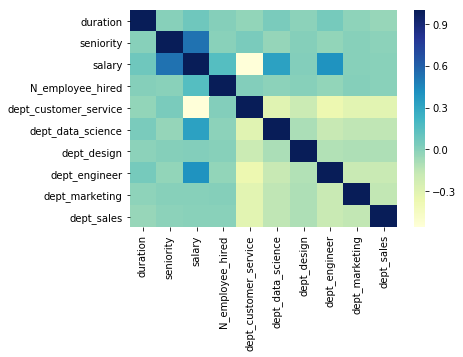

In [20]:
import seaborn as sns
sns.heatmap(pd.concat([quitY,quitX],1).corr(), cmap="YlGnBu" )

In [21]:
for i in quitX.columns: print(i,'\t\t',quitY.duration.corr(quitX[i]))

seniority 		 0.0026232409580239243
salary 		 0.07816864137441354
N_employee_hired 		 0.012383464251989358
dept_customer_service 		 -0.026620932443106923
dept_data_science 		 0.04277440698762898
dept_design 		 -0.008028876087743166
dept_engineer 		 0.050207586253510385
dept_marketing 		 -0.014991773488803997
dept_sales 		 -0.03917088770051751


###### No very strong correlation observed between duration and any other features.  Correlated with salary, looks like data science and engineer employees tend to stay longer (higher salary), and slightly correlated with company size (#employee hired), people tend to stay longer in larger companies. 

A linear regression model probably won't help in this case, but let's give it a try, and also random forest.

# Now let us build a model 

In [22]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
X,Y=quitX.values,quitY.values.ravel()

In [23]:
kf_3=KFold(n_splits=3, shuffle=True)
RF_r=RandomForestRegressor(n_estimators = 100)
for train,test in kf_3.split(X):
    reg = LinearRegression().fit(X[train],Y[train])
    p_train=reg.predict(X[train])
    p_test=reg.predict(X[test])
    print('Linear Regression\t',mean_squared_error(Y[train],p_train),mean_squared_error(Y[test],p_test))
    RF_r.fit(X[train],Y[train])
    p_train=RF_r.predict(X[train])
    p_test=RF_r.predict(X[test])
    print('Random Forest\t\t',mean_squared_error(Y[train],p_train),mean_squared_error(Y[test],p_test))

Linear Regression	 107916.53354405351 104601.51994588667
Random Forest		 29057.174144148106 126095.04466471256
Linear Regression	 104788.44684606518 110892.52972371041
Random Forest		 28787.398674327793 132684.88431017948
Linear Regression	 107494.13794504198 105402.99670632099
Random Forest		 28603.243320140908 130340.8356831868


In [24]:
Y.std()**2

107984.82850886558

###### Kinda as expected, both RF and LR performed like they are not even doing anything at all! And RF overfits like hell! I'll have some sleep for now and go on work on it if I have more time tomorrow. But for now it seems impossible to properly model the leaving time because in the data 'duration' is not very dependent on provided features.

It could be helpful to have some more features, such as 
    - employee's performance (rating from suervisor maybe?), 
    - companies' rank in the industry, 
    - employee's weekly total working time